# **About the company**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.


# ASK: Understanding stake holder's prospective

Moreno(Director of Marketing) has set a clear goal: 
* Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ.
* why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

**Business Task**

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?


# Prepare: Preparing the dataset

In [29]:
# importing libraries
library(tidyverse)
library(dplyr)
library(janitor)
library(lubridate)
library(moments)


In [2]:
# importing dataset

jan <- read.csv("/kaggle/input/cyclist12monthsdata/202101-divvy-tripdata.csv") 
feb <- read.csv("/kaggle/input/cyclist12monthsdata/202102-divvy-tripdata.csv")
mar <- read.csv("/kaggle/input/cyclist12monthsdata/202103-divvy-tripdata.csv")
Apr <- read.csv("/kaggle/input/cyclist12monthsdata/202104-divvy-tripdata.csv")
may <- read.csv("/kaggle/input/cyclist12monthsdata/202105-divvy-tripdata.csv")
jun <- read.csv("/kaggle/input/cyclist12monthsdata/202106-divvy-tripdata.csv")
july <- read.csv("/kaggle/input/cyclist12monthsdata/202107-divvy-tripdata.csv")
Aug <- read.csv("/kaggle/input/cyclist12monthsdata/202108-divvy-tripdata.csv")
Sep <- read.csv("/kaggle/input/cyclist12monthsdata/202109-divvy-tripdata.csv")
Oct <- read.csv("/kaggle/input/cyclist12monthsdata/202110-divvy-tripdata.csv")
Nov <- read.csv("/kaggle/input/cyclist12monthsdata/202111-divvy-tripdata.csv")
Dec <- read.csv("/kaggle/input/cyclist12monthsdata/202112-divvy-tripdata.csv")

In [5]:
# combining dataset's by month's to whole year

cyclist_data <- bind_rows(jan,feb,mar,Apr,may,jun,july,Aug,Sep,Oct,Nov,Dec)

head(cyclist_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89,-87.72,member
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90,-87.69,member
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90,-87.70,member
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92,-87.69,member
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90,-87.70,casual
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94,-87.71,casual


# Process : Processing the Dataset 

In [8]:

# cleaning data 
cyclist_data <- janitor::remove_empty(cyclist_data,which = c("cols"))
cyclist_data <- janitor::remove_empty(cyclist_data,which = c("rows")) 

head(cyclist_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89,-87.72,member
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90,-87.69,member
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90,-87.70,member
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92,-87.69,member
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90,-87.70,casual
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94,-87.71,casual


In [9]:
# converting datetime format to date/time and Hour

cyclist_data$Ymd <- as.Date(cyclist_data$started_at)
cyclist_data$started_at <- lubridate::ymd_hms(cyclist_data$started_at)
cyclist_data$ended_at   <- lubridate::ymd_hms(cyclist_data$ended_at)
cyclist_data$months <- format(as.Date(cyclist_data$Ymd), "%m")
cyclist_data$start_Hours <- lubridate::hour(cyclist_data$started_at)
cyclist_data$end_Hours   <- lubridate::hour(cyclist_data$ended_at)


# Calculating days of weeks 

cyclist_data$day_of_week <- wday(cyclist_data$started_at, week_start = 1) 

head(cyclist_data)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ymd,months,start_Hours,end_Hours,day_of_week
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<int>,<int>,<dbl>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89,-87.72,member,2021-01-23,01,16,16,6
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90,-87.69,member,2021-01-27,01,18,18,3
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90,-87.70,member,2021-01-21,01,22,22,4
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92,-87.69,member,2021-01-07,01,13,13,4
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90,-87.70,casual,2021-01-23,01,2,2,6
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94,-87.71,casual,2021-01-09,01,14,15,6


In [14]:
cyclist_summary <- cyclist_data  %>% drop_na() %>% select(-start_station_name,-start_station_id,-end_station_name
,-end_station_id,-start_lat,-start_lng,-end_lat,-end_lng,-start_Hours,-end_Hours,months) 

View(cyclist_summary)

ride_id,rideable_type,started_at,ended_at,member_casual,Ymd,months,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<date>,<chr>,<dbl>
E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,2021-01-23,01,6
DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,2021-01-27,01,3
EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,2021-01-21,01,4
4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,2021-01-07,01,4
BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,2021-01-23,01,6
5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,casual,2021-01-09,01,6
09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,member,2021-01-04,01,1
DF7A32A217AEFB14,electric_bike,2021-01-14 15:07:00,2021-01-14 15:13:40,member,2021-01-14,01,4
C2EFC62379EB716C,electric_bike,2021-01-09 09:57:55,2021-01-09 10:00:26,member,2021-01-09,01,6


# Analyze : Analyzing the dataset

In [16]:
# ride_length calculation
cyclist_summary$ride_length <- difftime(cyclist_summary$ended_at,cyclist_summary$started_at,units=c("mins"))
cyclist_summary$ride_length <- as.numeric(cyclist_summary$ride_length, "mins")  
cyclist_summary$ride_length <- cyclist_summary$ride_length %>% round(2)

head(cyclist_summary)


,ride_id,rideable_type,started_at,ended_at,member_casual,Ymd,months,day_of_week,ride_length
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<date>,<chr>,<dbl>,<dbl>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,2021-01-23,01,6,10.42
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,2021-01-27,01,3,4.07
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,2021-01-21,01,4,1.33
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,2021-01-07,01,4,11.70
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,2021-01-23,01,6,0.72
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,casual,2021-01-09,01,6,53.78


In [18]:

# Aveage ride_length

mean_ride_length <- mean(cyclist_summary$ride_length)

# Maximum ride_length
max_ride_length  <- max(cyclist_summary$ride_length)

# Mode of day of week
getmode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

v <- cyclist_summary$day_of_week

mode_day_of_week <- getmode(v)

print(mode_day_of_week )




[1] 6


In [50]:
# Creating Pivot Table for Average Ride Length by members

options(warn = -1)

pivot1 <- cyclist_summary %>% select(ride_length,member_casual) %>% group_by(member_casual) %>% 
summarise(Average_ride_length=mean(ride_length)) 

head(pivot1)


# Creating Pivot Table for average ride_length for users

pivot2 <- cyclist_summary %>% select(member_casual,ride_length,day_of_week) %>% group_by(member_casual,day_of_week) %>%  
  summarise(average_ride_length=mean(ride_length))


head(pivot2)

# Creating Pivot table number of rides by customers 

pivot3<- cyclist_summary %>% 
  select(ride_id, Ymd,member_casual) %>% 
  group_by(Ymd, member_casual) %>% summarise(number_of_rides = length(ride_id))

head(pivot3)

options(dplyr.summarise.inform = FALSE)

member_casual,Average_ride_length
<chr>,<dbl>
casual,29.30791
member,13.22386


member_casual,day_of_week,average_ride_length
<chr>,<dbl>,<dbl>
casual,1,30.41381
casual,2,25.60156
casual,3,24.73270
casual,4,24.78187
casual,5,27.52998
casual,6,31.65928


Ymd,member_casual,number_of_rides
<date>,<chr>,<int>
2021-01-01,casual,278
2021-01-01,member,788
2021-01-02,casual,543
2021-01-02,member,1731
2021-01-03,casual,581
2021-01-03,member,1801


# Share : Understanding the Data by Art of Visuallization

In [31]:
customer_labels <- c("casual" = "Numbers of rides by casual riders", 
                     "member" = "Numbers of rides by annual members")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


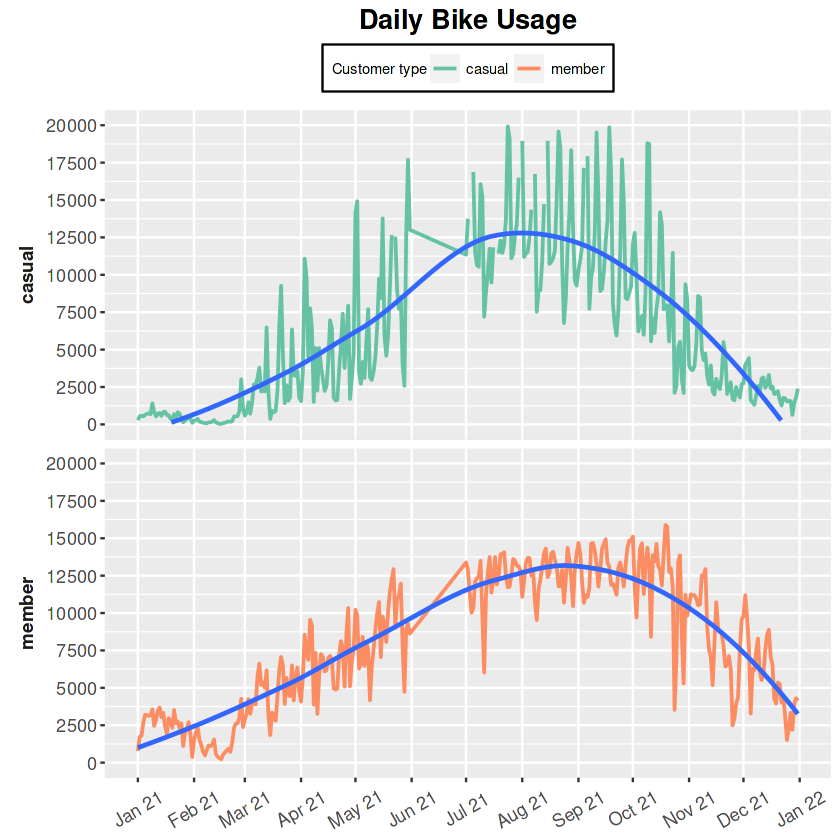

In [53]:
# Plot 1 line graph that represents the trends of bike daily usage between customers
options(warn = -1)

line_graph <- ggplot(pivot3, mapping = aes(x = Ymd, y = number_of_rides)) +
  geom_line(aes(color = pivot3$member_casual), size = rel(0.8)) +
   geom_smooth(se = FALSE, size = rel(1)) +
  facet_wrap(~pivot3$member_casual, ncol = 1, scales = "free_y", strip.position = "left",
             labeller = labeller(customer_type = pivot3$member_casual)) +
  scale_x_date(breaks = "1 month", minor_break = NULL, date_labels = "%b %y")+
  scale_y_continuous(breaks = seq(0, 25000, 2500), limits = c(0, 20000))+
  theme(axis.text.x = element_text(angle = 30, hjust = .5, vjust = .5, size = rel(1.2)),
        axis.text.y = element_text(size = rel(1.2)),
        legend.position = "top", 
        legend.background = element_rect(fill = "white", colour = "black"),
        legend.title = element_text(size = 8.5),
        legend.text = element_text(size = 8.5),
        plot.title = element_text(face = "bold", hjust = .5, size = 16),
        strip.placement = "outside",
        strip.background = element_blank(),
        strip.text = element_text(face = "bold", size = rel(1))) +
  labs(title = "Daily Bike Usage", x = NULL, y = NULL) +
  guides(color = guide_legend(title = "Customer type")) +
  scale_color_brewer(palette = "Set2")

print(line_graph)

options(dplyr.summarise.inform = FALSE)



**Findings**

The trends in total daily rides of casual and members are similar to each other with a decrease from Sep 21-Feb 22, then with an increase from Mar 22-Sep 22. However, with the casual riders, the total daily rides of casual has bigger range with the minimum was 126 and the maximum was 19211 rides. Compared to that, the total daily rides of members has smaller range with min. was 576 and max. was 16194.

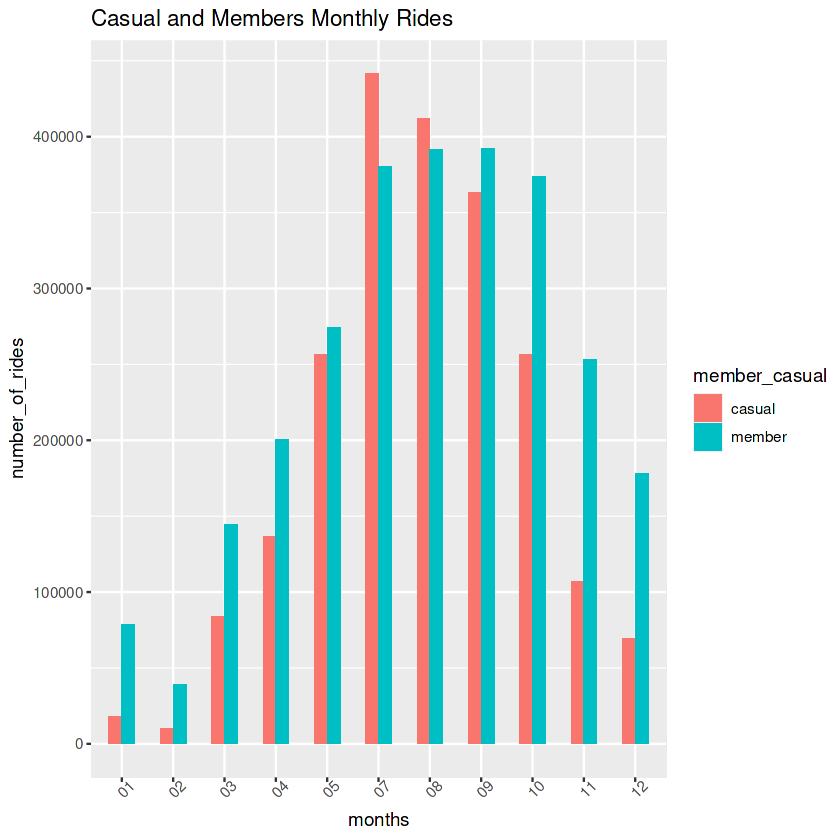

In [42]:
# plotting Bar-graphs for visuallizing the relation between customers rides on monthly basis
cyclist_summary %>%  
group_by(member_casual, months) %>% summarise(number_of_rides = n(),.groups="drop") %>% 
  arrange(member_casual, months) %>%
  ggplot(aes(x = months, y = number_of_rides, fill = member_casual)) +
  labs(title ="Casual and Members Monthly Rides") +
  theme(axis.text.x = element_text(angle = 45)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))
  
               
                     

**Findings:**

The popularity of the bicycle is growing during the warmer months, for casual and member rides. But members are riding bikes more during the colder months.

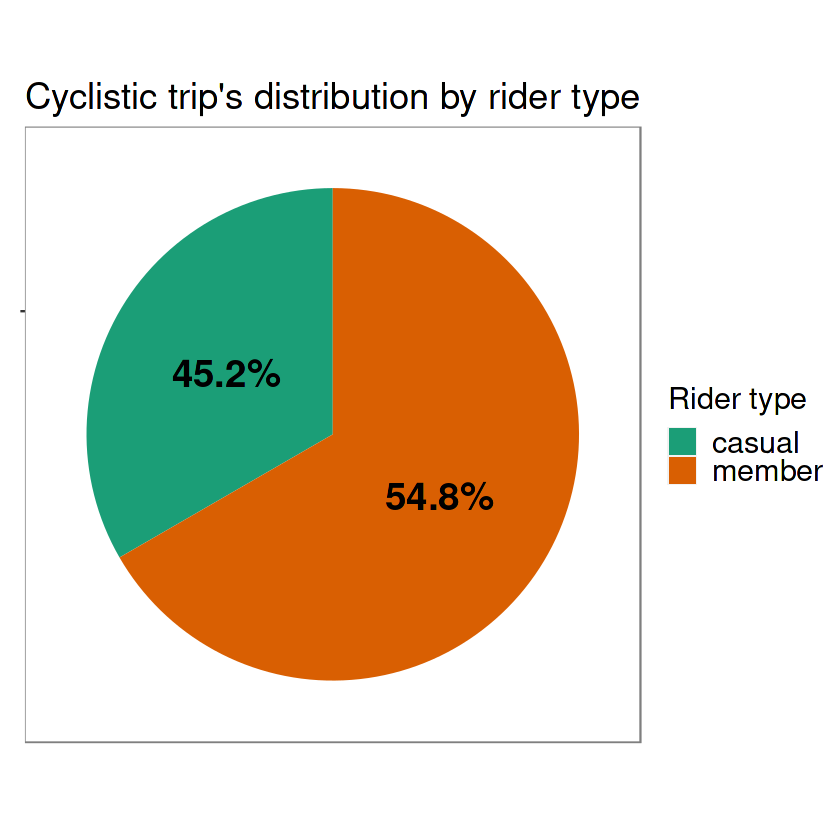

In [43]:
# plotting pie-chart which shows the distribution of customers type

pie_table <- cyclist_data %>% 
  group_by(member_casual) %>% 
  count() %>%  
  ungroup() %>% 
  mutate(pcnt = n / sum(n)) %>% 
  mutate(labels = scales::percent(pcnt))

ggplot(pie_table, aes(x="", y=labels, fill=member_casual)) +
  geom_col() + 
  geom_text(aes(label=labels), size=8, color="black", fontface="bold",
            position=position_stack(vjust = 0.5)) +
  coord_polar("y", start=0) +
  theme(text = element_text(size = 18), 
        legend.text = element_text(size = 18),
        legend.title = element_text(size = 18),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        panel.background = element_rect(fill="white", colour = "grey50")) +
  scale_fill_brewer(palette = "Dark2") +
  labs(title="Cyclistic trip's distribution by rider type", fill="Rider type", x=element_blank(), y=element_blank())

**Findings:**

This pie distribution represents the total quantity of members and casual riders and the findings shows that the members are more likely to stay through out the year rather then the casual members.

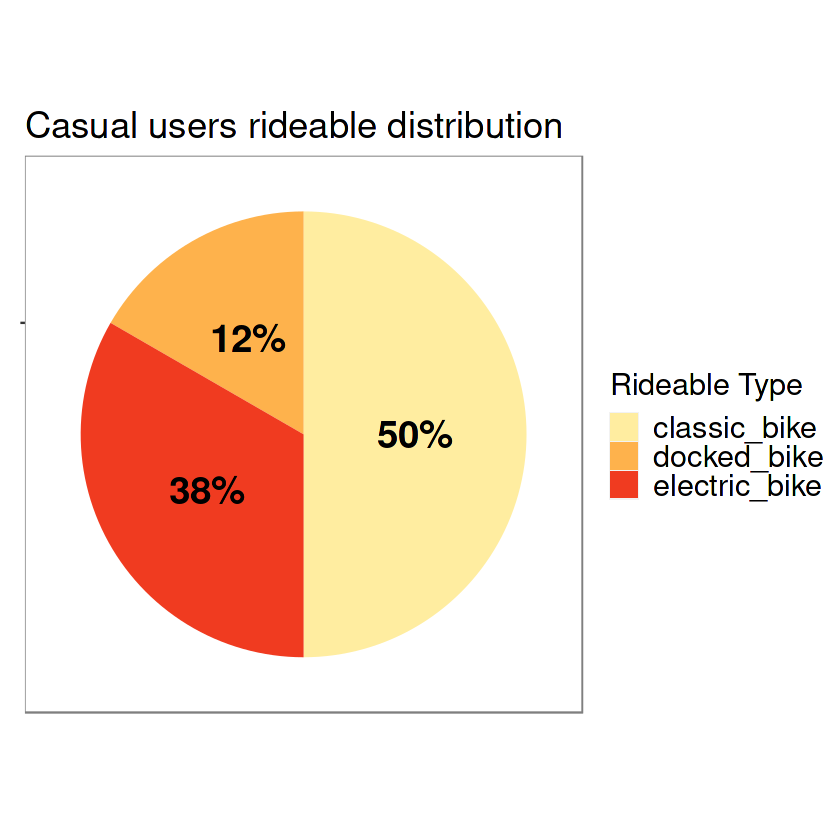

In [47]:
# pie-chart representing types of bikes avaliable
bike_types<- cyclist_summary %>% 
  group_by(member_casual, rideable_type) %>% 
  filter(member_casual == "casual" )%>% 
  count() %>% 
  ungroup() %>% 
  mutate(pcnt = n / sum(n)) %>% 
  mutate(labels = scales::percent(pcnt))

ggplot(bike_types, aes(x="", y=labels, fill=rideable_type)) +
  geom_col() + 
  coord_polar("y", start=0) +
  geom_text(aes(label=labels), size=8, color="black", fontface="bold",
            position=position_stack(vjust = 0.5)) +
  theme(text = element_text(size = 18), 
        legend.text = element_text(size = 18),
        legend.title = element_text(size = 18),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        panel.background = element_rect(fill="white", colour = "grey50")) +
  scale_fill_brewer(palette = "YlOrRd") +
  labs(title="Casual users rideable distribution", fill="Rideable Type", x=element_blank(), y=element_blank())

**Findings:**

The key finding from this pie-chart represents the disribution amoung ride able type of bikes which shows the priority of customers throughout the year for the bike the most in demand bike is the classic one as mostly customers prioritized it through out the year and the docked bike is mostly likely to be used by a particular group of customers.

# ACT : Recommendations

* As a result of this study, it is evident that it is financially more convenient to have users as a members than casual users, so we must find suitable strategies to convert casual users to members.

* Focus to run marketing campaign during the months that has higher trends of using bikes. We've found that there was a significant decrease in both casual and members users during Dec 21-Feb 22, the winter months. However, if we want to increase our sales during these months, we can run some promotion campaign to encourage riding bike during these months.

* Among the strategies to be implemented could be different levels of memberships, with discounts for frequent users, taking the number of trips, the idea would be to encourage the user to travel more by bicycle because that translates into savings.

* A weekly, monthly and quarterly membership schemes and also for working days and another only for weekends or holidays, as well as analyze an incentive scheme that can be offered to member users.
